# All algorithms and useful notes at one places

# Data Preprocessing for Machine learning in Python
Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

importing libaries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


 Feature scaling is a method used to normalize the range of independent variables or features of data

finding null value and tried to fill the gap by means values or if data is very large then eliminates them.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [5]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [6]:
df1=df.dropna().reset_index()    # deleting the columns and after that reset the dataframes
df1

,index,Country,Age,Salary,Purchased
0,0,France,44.0,72000.0,No
1,1,Spain,27.0,48000.0,Yes
2,2,Germany,30.0,54000.0,No
3,3,Spain,38.0,61000.0,No
4,5,France,35.0,58000.0,Yes
5,7,France,48.0,79000.0,Yes
6,8,Germany,50.0,83000.0,No
7,9,France,37.0,67000.0,Yes


In [7]:
df.describe()   # find the details of dataframes and finding means and min and other

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [8]:
df.fillna(df.mean(), inplace=True)  # filling the gap by using means values
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [9]:
x=df.iloc[:,0:3].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
y=df.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [12]:
df2=df.copy()
df2['Country']=le.fit_transform(df2['Country'])
df3=df2.drop(['Purchased'],axis='columns')
df3

,Country,Age,Salary
0,0,44.000000,72000.000000
1,2,27.000000,48000.000000
2,1,30.000000,54000.000000
3,2,38.000000,61000.000000
4,1,40.000000,63777.777778
5,0,35.000000,58000.000000
6,2,38.777778,52000.000000
7,0,48.000000,79000.000000
8,1,50.000000,83000.000000
9,0,37.000000,67000.000000


The train-test split is a technique for evaluating the performance of a machine learning algorithm.The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

In [13]:
from sklearn.model_selection import train_test_split
df3_train,df3_test,y_train,y_test =train_test_split(df3,y,test_size=0.2 , random_state=1)

In [14]:
df3_train

,Country,Age,Salary
6,2,38.777778,52000.000000
4,1,40.000000,63777.777778
0,0,44.000000,72000.000000
3,2,38.000000,61000.000000
1,2,27.000000,48000.000000
7,0,48.000000,79000.000000
8,1,50.000000,83000.000000
5,0,35.000000,58000.000000


In [15]:
df3_test

,Country,Age,Salary
2,1,30.0,54000.0
9,0,37.0,67000.0


In [16]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [17]:
y_test

array([0, 1])

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods. One of its main advantages is the ease of interpreting results

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression ()
reg.fit(df3,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
reg.coef_

array([-2.85603957e-01, -3.60999384e-02,  5.92469067e-06])

In [20]:
reg.intercept_

1.779055343274294

In [21]:
reg.predict([[1,36,60000]])

array([0.54933505])

# linear algorithm example

libaries should be same as above 

Linear regression is probably one of the most important and widely used regression techniques. It’s among the simplest regression methods.Linear regression calculates the estimators of the regression coefficients or simply the predicted weights, denoted with 𝑏₀, 𝑏₁, …, 𝑏ᵣ. They define the estimated regression function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ.

In [22]:
lrg =pd.read_csv('Salary_Data.csv') #lrg=linear regression
lrg.head(1)

,YearsExperience,Salary
0,1.1,39343.0


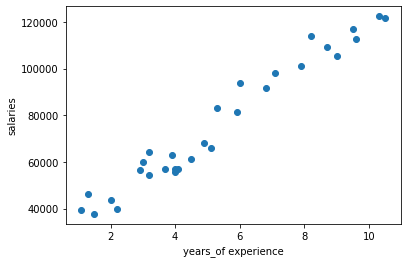

In [23]:
plt.scatter(lrg.YearsExperience,lrg.Salary)
plt.xlabel('years_of experience')
plt.ylabel('salaries')
plt.show()

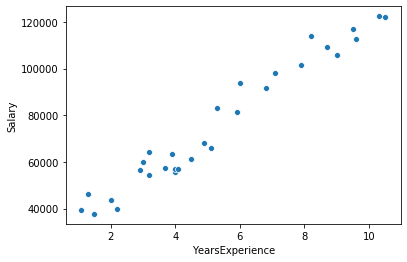

In [24]:
sns.scatterplot(lrg.YearsExperience,lrg.Salary)

In [29]:
yoe=lrg.drop(['YearsExperience'],axis='columns')
yoe

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [30]:
sal=lrg.drop(['Salary'],axis='columns')
sal

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [31]:
from sklearn.model_selection import train_test_split
yoe_train,yoe_test,sal_train,sal_test=train_test_split(yoe,sal,test_size=0.2,random_state=0)

In [32]:
yoe_train

,Salary
27,112635.0
11,55794.0
17,83088.0
22,101302.0
5,56642.0
16,66029.0
8,64445.0
14,61111.0
23,113812.0
20,91738.0


In [33]:
yoe_test

,Salary
2,37731.0
28,122391.0
13,57081.0
10,63218.0
26,116969.0
24,109431.0


In [34]:
sal_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [35]:
sal_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(yoe,sal)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
reg.predict(yoe_train)

array([[9.02289696],
       [3.26685563],
       [6.03080053],
       [7.87525325],
       [3.35272891],
       [4.30330965],
       [4.14290484],
       [3.80528514],
       [9.14208664],
       [6.90674848],
       [2.29581922],
       [9.95828786],
       [3.70796884],
       [1.65642785],
       [5.85611727],
       [7.12973546],
       [3.40812122],
       [3.13024825],
       [8.30867027],
       [2.02442725],
       [1.60093427],
       [7.56851956],
       [4.49662579],
       [3.38462759]])

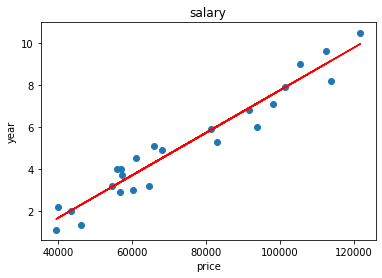

In [39]:
plt.scatter(yoe_train,sal_train)
plt.plot(yoe_train,reg.predict(yoe_train) , color='red')
plt.title('salary')
plt.xlabel('price')
plt.ylabel('year')
plt.show()

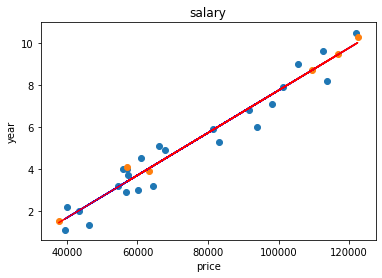

In [40]:
plt.scatter(yoe_train,sal_train)
plt.scatter(yoe_test,sal_test)
plt.plot(yoe_train,reg.predict(yoe_train),color = 'blue')
plt.plot(yoe_test,reg.predict(yoe_test),color='red')
plt.title('salary')
plt.xlabel('price')
plt.ylabel('year')
plt.show()

# multiple regression algorithm

Multiple regression is an extension of simple linear regression. It is used when we want to predict the value of a variable based on the value of two or more other variables.The variable we want to predict is called the dependent variable

In [58]:
mra=pd.read_csv('50_Startups.csv')
mra

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [63]:
mra.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
mra1=mra.copy()
mra1['State']=le.fit_transform(mra1['State'])
mra1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [67]:
mrax=mra1.drop(['Profit'],axis='columns')
mrax

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [70]:
mray=mra1.Profit
mray

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
mrax_train,mrax_test,mray_train,mray_test=train_test_split(mrax,mray,random_state=0,test_size=0.2)

In [75]:
mrax_train.head(1)

,R&D Spend,Administration,Marketing Spend,State
33,55493.95,103057.49,214634.81,1


In [82]:
from sklearn.linear_model import LinearRegression
regmra=LinearRegression()
regmra.fit(mrax,mray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
from mpl_toolkits.mplot3d import Axes3D  # libaries used for 3d 

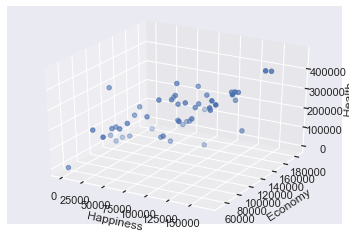

In [85]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = mrax['R&D Spend']
y = mrax['Administration']
z = mrax['Marketing Spend']

ax.set_xlabel("Happiness")
ax.set_ylabel("Economy")
ax.set_zlabel("Health")

ax.scatter(x, y, z)

plt.show()

In [86]:
regmra.predict(mrax_train)

array([ 97914.37368769,  90488.40342916, 110600.45227028,  89060.01706124,
       129015.06896831, 160023.60415542, 149550.343104  ,  47625.13881299,
        49146.57324723, 101772.02860061, 146214.62758875,  99451.95339849,
        99023.17676297, 116937.89389796,  70640.77104461, 116662.14204417,
        60142.13119236, 151721.15820902, 127510.97126516, 102259.49040895,
       163561.20795755, 130170.79803397,  74836.31063948,  48234.27349509,
       189182.66604537, 129138.8786306 ,  89641.23303238, 113341.03973173,
       158138.91212502, 109996.45606057,  75284.11129779, 117296.98376962,
       115613.22799121, 154909.30674   ,  83750.15676874,  56162.99623609,
       173677.49061831, 192502.76441569,  46509.56395631,  64631.11685137])

In [87]:
regmra.predict([[12800,132450,320089,2]])

array([65573.78247743])

In [88]:
regmra.intercept_

50142.50644347619

In [89]:
regmra.coef_

array([  0.80575968,  -0.02682585,   0.02722767, -22.32057723])

# polynomial algorithm

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pra=pd.read_csv('Position_Salaries.csv')
pra

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
prax=pra.iloc[:,1:-1].values
prax

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [21]:
pray=pra.iloc[:,-1].values
pray

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
preg = PolynomialFeatures(degree=2)
prax_poly = preg.fit_transform(prax)
lin_reg = LinearRegression()
lin_reg.fit(prax_poly,pray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
prap=lin_reg.predict(prax_poly)
prap

array([ 45010.3866585 ,  49906.51993701,  60373.9201838 ,  79127.5195257 ,
       111308.72067772, 148691.27929639, 200872.48045163, 299626.07980309,
       500093.48007123, 999989.6133952 ])

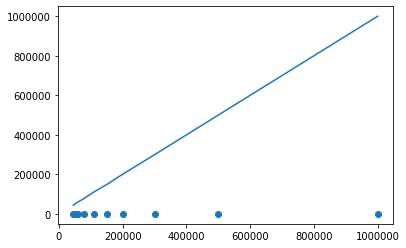

In [46]:
plt.scatter(pra.Salary,pra.Level)
plt.plot(pray,prap)
plt.show()

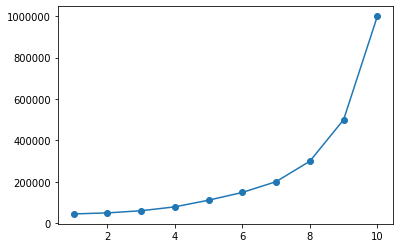

In [51]:
plt.scatter(pra['Level'],pra['Salary'])
plt.plot(pra['Level'],prap)
plt.show()